In [ ]:
!pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.7 MB/s eta 0:00:00


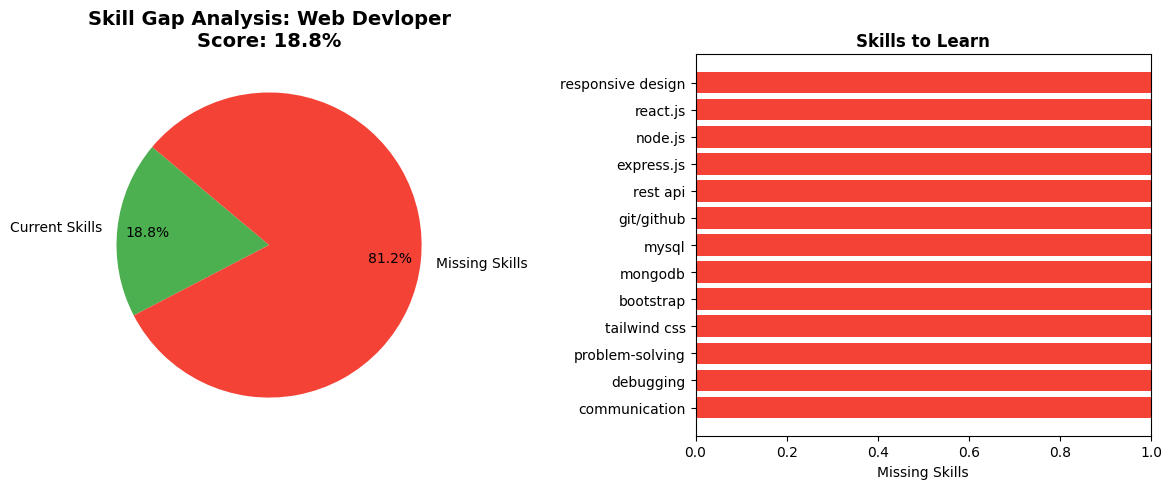


Role: Web Devloper
Skill Score: 18.8%
--------------------------------------------------
✅ Current Skills:
   • html
   • css
   • javascript

❌ Missing Skills:
   • responsive design
   • react.js
   • node.js
   • express.js
   • rest api
   • git/github
   • mysql
   • mongodb
   • bootstrap
   • tailwind css
   • problem-solving
   • debugging
   • communication



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util
import warnings
warnings.filterwarnings("ignore")

# ===============================
# Skill Gap Model with Semantic Matching
# ===============================
class SkillGapModel:
    def __init__(self, dataset_path):
        self.data = pd.read_csv(dataset_path)
        self.data['Skills'] = self.data['Skills'].fillna("").str.lower()
        self.data['Job Title'] = self.data['Job Title'].str.lower()

        # Load semantic model
        self.model = SentenceTransformer('all-MiniLM-L6-v2')
        self.job_titles = self.data['Job Title'].tolist()
        # Compute embeddings for all job titles
        self.job_embeddings = self.model.encode(self.job_titles, convert_to_tensor=True)

    def find_best_job(self, user_input):
        """
        Find the most relevant job based on semantic similarity.
        """
        input_embedding = self.model.encode([user_input.lower()], convert_to_tensor=True)
        cos_scores = util.cos_sim(input_embedding, self.job_embeddings)
        best_idx = cos_scores.argmax()
        best_score = cos_scores[0][best_idx].item()

        # Optional threshold to avoid completely irrelevant matches
        if best_score < 0.5:
            return None
        return self.job_titles[best_idx]

    def analyze_skills(self, user_skills, user_target_role):
        user_skills = [s.strip().lower() for s in user_skills.split(",")]

        matched_role = self.find_best_job(user_target_role)
        if not matched_role:
            return None  # no relevant match

        job_row = self.data[self.data['Job Title'] == matched_role]
        required_skills = [s.strip() for s in job_row.iloc[0]['Skills'].split(",") if s.strip()]

        current_skills = [s for s in required_skills if s in user_skills]
        missing_skills = [s for s in required_skills if s not in user_skills]
        skill_score = len(current_skills) / len(required_skills) * 100 if required_skills else 0

        analysis = {
            "role": matched_role.title(),
            "current_skills": current_skills,
            "missing_skills": missing_skills,
            "all_required": required_skills,
            "skill_score": skill_score
        }
        return analysis

# ===============================
# Visualization
# ===============================
def plot_skill_analysis(analysis):
    current_count = len(analysis['current_skills'])
    missing_count = len(analysis['missing_skills'])

    labels = ['Current Skills', 'Missing Skills']
    values = [current_count, missing_count]
    colors = ['#4CAF50', '#F44336']

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax[0].pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, pctdistance=0.8)
    ax[0].set_title(f"Skill Gap Analysis: {analysis['role']}\nScore: {analysis['skill_score']:.1f}%", fontsize=14, weight="bold")

    ax[1].barh(analysis['missing_skills'], [1]*len(analysis['missing_skills']), color='#F44336')
    ax[1].set_xlim(0, 1)
    ax[1].set_xlabel("Missing Skills")
    ax[1].set_title("Skills to Learn", fontsize=12, weight="bold")
    ax[1].invert_yaxis()

    plt.tight_layout()
    plt.show()

    print("\n" + "="*50)
    print(f"Role: {analysis['role']}")
    print(f"Skill Score: {analysis['skill_score']:.1f}%")
    print("-"*50)
    print("✅ Current Skills:")
    for skill in analysis['current_skills']:
        print(f"   • {skill}")
    print("\n❌ Missing Skills:")
    for skill in analysis['missing_skills']:
        print(f"   • {skill}")
    print("="*50 + "\n")


# ===============================
# Example Run
# ===============================
if __name__ == "__main__":
    model = SkillGapModel("new_job.csv")  # load your dataset

    # Example user
    user_skills = "python, sql, java, android,html,css,javascript,api"
    user_target_role = "web devloper"  # user can type partial, abbreviation, or vague role

    analysis = model.analyze_skills(user_skills, user_target_role)
    if analysis:
        plot_skill_analysis(analysis)
    else:
        print("No relevant job found in dataset.")
